# David Böhler, Nico Knünz, Julian Mathis

# Cross-Validation Exercises

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/banknote.pickle -P ../data
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/banknote_noisy.pickle -P ../data


import pickle
import numpy as np

from dataclasses import dataclass


@dataclass
class BanknotesDataset:
    Description: str
    Attributes: list()
    Targets: list()
    X: np.array
    Y: np.array

def load_dataset(filename):
    with open(filename, 'rb') as fd:
        dataset = pickle.load(fd)
    return dataset

dataset = load_dataset('../data/banknote_noisy.pickle')



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://github.com/shegenbart/]870 files                0% [<=>                           ]       0          B/s87[Files: 0  Bytes: 0  [0 B/s] Re]870 files                0% [ <=>                          ]       0          B/s87[https://raw.githubusercontent.]87banknote.pickle.11   100% [=============================>]   49.01K    --.-KB/s87[Files: 1  Bytes: 49.01K [70.73]8

7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://github.com/shegenbart/]870 files                0% [<=>                           ]       0          B/s87[Files: 0  Bytes: 0  [0 B/s] Re]870 files                0% [ <=>                          ]       0          B/s87[https://raw.githubusercontent.]87banknote_noisy.pickl  76% [======================>       ]   37.65K    --.-KB/s87banknote_noisy.pickl 100% [=============================>]   49.03K    3.70MB/s87[Files: 1  Bytes: 49.03K [65.03]8

In [3]:
print(dataset.Description)

Noisy Version! Data were extracted from images that were taken
from genuine and forged banknote-like specimens.
For digitization, an industrial camera usually
used for print inspection was used. The final
images have 400x 400 pixels. Due to the object
lens and distance to the investigated object
gray-scale pictures with a resolution of about
660 dpi were gained. Wavelet Transform tool were
used to extract features from images.


## Exercise 1:

In this exercise we will study the effect of training a ML model using the training data. Because all our methods aim to find a model that works as good as possible on our training data, we often get an unrealistically high score on our training data.

* Inspect the banknote-fraud dataset stored in ```dataset```.
* Train a decision tree classifier and predict the accuracy of all data using the ```accuracy_score()``` function.
* Discuss the results, is it realistic?

In [4]:
X = dataset.X
Y = dataset.Y

In [5]:
# check shape of input
dataset.X.shape

(1372, 4)

In [6]:
dataset_df = pd.DataFrame(dataset.X)
dataset_df["target"] = dataset.Y
dataset_df

,0,1,2,3,target
0,2.392097,7.377762,-1.309684,-1.909201,0
1,4.987971,9.209283,1.171465,0.278670,0
2,3.069127,0.090559,1.103164,-0.604826,0
3,4.566408,12.669748,-2.499550,-3.356163,0
4,1.764492,-5.275010,3.172741,-1.413929,0
...,...,...,...,...,...
1367,-0.992391,0.234414,-1.981034,1.199523,1
1368,-0.251063,-10.231010,10.081752,1.243856,1
1369,-6.809959,-11.858423,14.950261,-2.333518,1
1370,-4.949187,-12.058904,10.943232,-1.746224,1


In [7]:
dataset_df.describe()

,0,1,2,3,target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.429965,1.921197,1.379320,-1.167844,0.444606
std,3.256771,6.578724,4.742754,2.357992,0.497103
min,-8.689261,-19.867578,-9.564703,-9.577753,0.000000
25%,-1.938486,-2.624538,-1.841298,-2.495843,0.000000
50%,0.465732,2.136538,0.816269,-0.743799,0.000000
75%,2.874721,6.784955,3.661402,0.537529,1.000000
max,8.274221,18.744145,19.639731,5.059831,1.000000


The data consists of 1372 samples with 4 features each. The target suggests 2 categories.

In [8]:
from sklearn import tree

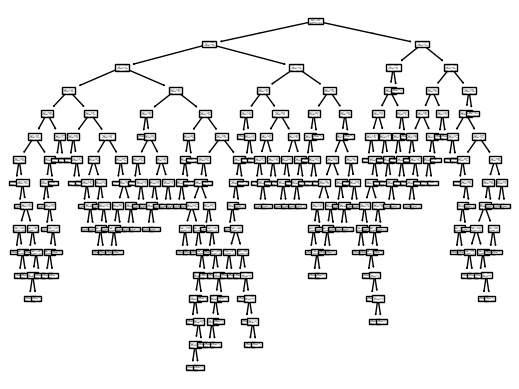

In [9]:
# Initialize the classifier
clf_1 = tree.DecisionTreeClassifier()

# Fit the classifier with all data
clf_1.fit(X, Y)

# Make predictions
Y_pred = clf_1.predict(dataset.X)

# Plot decision tree
tree.plot_tree(clf_1)
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(Y,Y_pred)

1.0

### Results
The results show an accuracy score of 1, which means all samples are labeled correctly. In this case, the model is highly overfitted, having learned the data by heart. Decision trees are particularly prone to overfitting.

## Exercise 2:

In the previous exercise we saw that using the same data to evaluate a model that was used to optimize a method gives unrealistically high scores. Instead we have to hold back on some of the data during training and use this held-back data to perform the evaluation.

* Create a test-train split of the banknote-fraud dataset (```dataset```) using the ```train_test_split()``` function from sklearn.
* Train another decision tree on the *train* portion and evaluate it's accuracy (```accuracy_score()```) on the *test* portion.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [14]:
# Show sizes of Training and Test Data
print(f"X Train shape: \t{X_train.shape}\nX Test shape: \t{X_test.shape}\nY Train shape: \t{y_train.shape}\nY Test shape: \t{y_test.shape}")

X Train shape: 	(1029, 4)
X Test shape: 	(343, 4)
Y Train shape: 	(1029,)
Y Test shape: 	(343,)


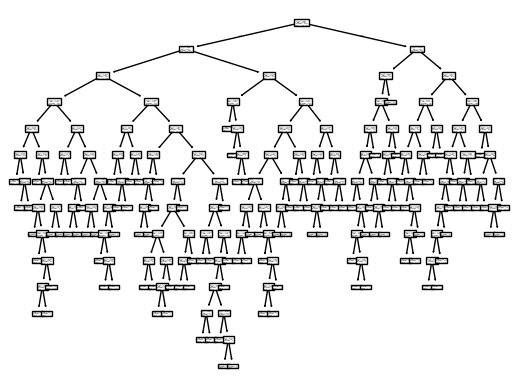

In [15]:
# Initialize the classifier
clf_2 = tree.DecisionTreeClassifier()

# Fit the classifier with training data
clf_2.fit(X_train, y_train)

# Plot decision tree
tree.plot_tree(clf_2)
plt.show()

In [16]:
Y_test_pred = clf_2.predict(X_test)
accuracy_score(y_test,Y_test_pred)

0.8396501457725948

### With random state shuffeling

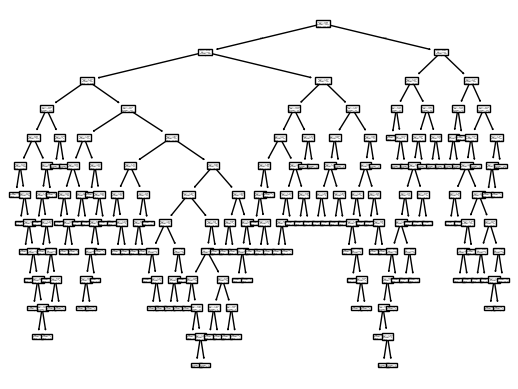

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42)

# Initialize the classifier
clf_3 = tree.DecisionTreeClassifier()

# Fit the classifier with training data
clf_3.fit(X_train, y_train)

# Plot decision tree
tree.plot_tree(clf_3)
plt.show()

In [18]:
# Make predictions
Y_test_pred = clf_3.predict(X_test)

# Get accuracy score
accuracy_score(y_test,Y_test_pred)

0.8163265306122449

### Results
The Accuracy score looks much more realistic with the model applied to a separate test set

## Exercise 3:

There is a nice trick to know to check if your code or your validation are somewhat flawed. Shuffle your labels randomly, then train your classifier with the suffled labels. What performance would you expect from a *fair* classifier?

* Shuffle your training labels (```np.random.shuffle()```)
* Train a classifier, what accuracy would you expect?
* Validate on your test set.

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42)
# Shuffle the labels
y_train_shuffeled = np.copy(y_train)
np.random.shuffle(y_train_shuffeled)
# Initialize the classifier
clf_4 = tree.DecisionTreeClassifier()
# Fit the classifier with training data
clf_4.fit(X_train, y_train_shuffeled)

# Make predictions
Y_test_pred_shuffeled = clf_4.predict(X_test)

# Get accuracy score
accuracy_score(y_test,Y_test_pred_shuffeled)

0.5539358600583091

### Results
We expect an accuracy of ~0.5, since there a 2 categories.

## Exercise 4:

Let's use scikit-learn's implementation of cross-cross_validate (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

* Perform cross-validation using the ```cross_validate()``` function in a 10-fold cross-validation.  
* Report the mean and standard deviation of your results.
* Experiment with the number of folds (in k-fold cross validation), how does it influence your mean and standard deviation?

In [20]:
from sklearn.model_selection import cross_validate

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42)

# Initialize the classifier
clf_5 = tree.DecisionTreeClassifier()

# Fit the classifier with training data
clf_5.fit(X_train,y_train)

# Cross Validation
validation = cross_validate(clf_5, X_test, y_test, cv = 10)

In [22]:
# Show cross validation results
pd.DataFrame(validation)

,fit_time,score_time,test_score
0,0.000983,0.000343,0.857143
1,0.000964,0.000311,0.742857
2,0.000888,0.000297,0.857143
3,0.000962,0.000298,0.823529
4,0.000948,0.000303,0.882353
5,0.000901,0.000293,0.911765
6,0.000900,0.000290,0.852941
7,0.000933,0.000310,0.941176
8,0.000841,0.000294,0.941176
9,0.000890,0.000290,0.794118


In [23]:
pd.DataFrame(validation).describe()

,fit_time,score_time,test_score
count,10.000000,10.000000,10.000000
mean,0.000921,0.000303,0.860420
std,0.000044,0.000016,0.063084
min,0.000841,0.000290,0.742857
25%,0.000892,0.000293,0.830882
50%,0.000917,0.000297,0.857143
75%,0.000958,0.000308,0.904412
max,0.000983,0.000343,0.941176


In [24]:
print(f"Mean score of 10-fold cross validation: {validation["test_score"].mean()}")
print(f"Std of 10-fold cross validation score: {validation["test_score"].std()}")

Mean score of 10-fold cross validation: 0.8604201680672269
Std of 10-fold cross validation score: 0.05984638905708591


### Check Means and Stds with different amounts of splits

In [25]:
# check for 2 ... 100 folds
splits = np.arange(2,101)
means = np.zeros(len(splits))
stds = np.zeros(len(splits))

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42)

for i, split in enumerate(splits):
    # Initialize the classifier
    clf_6 = tree.DecisionTreeClassifier(random_state=42)
    
    # Fit the classifier with training data
    clf_6.fit(X_train,y_train)

    # Validate classifier with test data
    validation = cross_validate(clf_6, X_test, y_test, cv = split)

    # Calculate mean and std of test scores
    means[i] = validation["test_score"].mean()
    stds[i] = validation["test_score"].std()

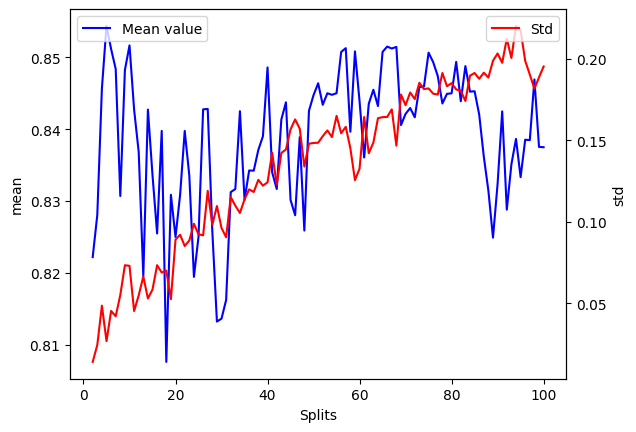

In [27]:
# plot mean and std for each amount of splits
fig, ax1 = plt.subplots() 
ax1.set_xlabel('Splits') 
ax1.set_ylabel('mean')
ax1.plot(splits, means, color = "blue", label = "Mean value")
plt.legend(loc="upper left")

ax2 = ax1.twinx() 
ax2.plot(splits, stds, color = "red", label = "Std")
ax2.set_ylabel('std')
plt.legend(loc="upper right")
plt.show()

### Results
The mean does not change significantly, but with more splits the std will be higher. 

## Exercise 5:

* Train a decision tree classifier for the banknotes dataset (it should already be loaded in the ```dataset``` variable), compute and visualize the confusion matrix.
* Compute the accuracy, specificity, recall and precision in a 10 fold cross-validation and report the mean and standard deviation of each.

**Hints:**

1. Implement each measure as a function with a prototype like this:
```python
def accuracy(Y_pred, Y_real):
        pass
```

2. Use a confusion matrix to compute the true-positives, true-negatives, false-positives and false-positives.
3. ```cross_validate()``` accepts a parameter ```scoring```which accepts a dictionary of callables, use **lambdas** to  define your individual scorers.

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [29]:
def accuracy(Y_pred, Y_real):
    return np.mean(Y_pred == Y_real)

def specificity(Y_pred, Y_real):
    tn, fp, fn, tp = confusion_matrix(Y_real, Y_pred).ravel()
    return tn / (tn + fp)

def recall(Y_pred, Y_real):
    tn, fp, fn, tp = confusion_matrix(Y_real, Y_pred).ravel()
    return tp / (tp + fp)

def precision(Y_pred, Y_real):
    tn, fp, fn, tp = confusion_matrix(Y_real, Y_pred).ravel()
    return tp / (tp + fn)

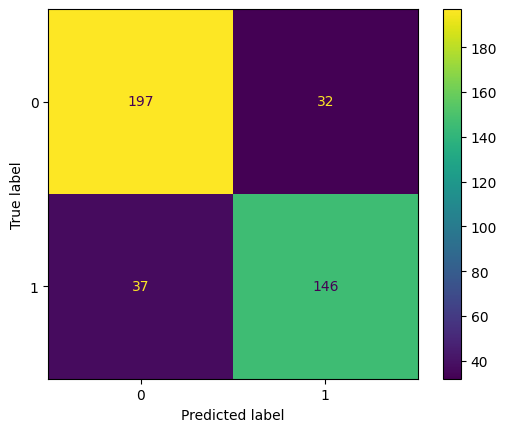

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the classifier
clf_7 = tree.DecisionTreeClassifier(random_state=42)

# Fit the classifier with training data
clf_7.fit(X_train, y_train)

# Make predictions
y_pred = clf_7.predict(X_test)

# Compute and plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cnf_matrix)
disp.plot()

In [31]:
scoring = {
    'accuracy': lambda clf, X, y: accuracy(clf.predict(X), y),
    'specificity': lambda clf, X, y: specificity(clf.predict(X), y),
    'recall': lambda clf, X, y: recall(clf.predict(X), y),
    'precision': lambda clf, X, y: precision(clf.predict(X), y),
}

validation = cross_validate(clf_7, X_test, y_test, scoring = scoring, cv = 10)

In [32]:
print(f"Accuracy mean: {validation["test_accuracy"].mean()}")
print(f"Accuracy std: {validation["test_accuracy"].std()} \n")

print(f"Specificity mean: {validation["test_specificity"].mean()}")
print(f"Specificity std: {validation["test_specificity"].std()} \n")

print(f"Recall mean: {validation["test_recall"].mean()}")
print(f"Recall std: {validation["test_recall"].std()} \n")

print(f"Precision mean: {validation["test_precision"].mean()}")
print(f"Precision std: {validation["test_precision"].std()} \n")

Accuracy mean: 0.8473867595818817
Accuracy std: 0.052016314673966585 

Specificity mean: 0.842885375494071
Specificity std: 0.06485857695364969 

Recall mean: 0.8166234426646326
Recall std: 0.06510092245756911 

Precision mean: 0.8535087719298247
Precision std: 0.09579270464172372 

